#  Customer Segmentation using Machine Learning

## Objective
To segment customers based on demographic and behavioral patterns using unsupervised machine learning techniques. This segmentation will help in identifying customer groups for targeted marketing and personalized banking product recommendations.


# 1.Importing Libraries

original dataset
Dataset: CC GENERAL.csv
Source: Kaggle (Arjun Bhasin, 2013)
Rows: 8950, Columns: 18

In [ ]:
!pip install sdv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.1/198.1 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage, dendrogram

from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata
from google.colab import files

# 2.Load and prepare original dataset

In [ ]:

uploaded = files.upload()



Saving CC GENERAL.csv to CC GENERAL.csv


In [ ]:
df = pd.read_csv('CC GENERAL.csv')


In [ ]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
print(df.isnull().sum())


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [ ]:

df_clean = df.drop(columns=['CUST_ID']).copy()
df_clean['MINIMUM_PAYMENTS'] = df_clean['MINIMUM_PAYMENTS'].fillna(df_clean['MINIMUM_PAYMENTS'].median())
df_clean['CREDIT_LIMIT'] = df_clean['CREDIT_LIMIT'].fillna(df_clean['CREDIT_LIMIT'].median())


In [ ]:
print(df_clean.isnull().sum())

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


# 2.Generate Synthetic Data using SDV

In [ ]:

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df_clean)


In [ ]:
# Train synthesizer
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(df_clean)

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:163: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:129: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [ ]:
# Generate 500,000 synthetic rows
synthetic_data = synthesizer.sample(500000)

# 4.Load & Inspect Synthetic Dataset

In [ ]:

synthetic_data.to_csv("synthetic_credit_data.csv", index=False)

df = pd.read_csv("synthetic_credit_data.csv")

In [ ]:
from sdv.metadata import SingleTableMetadata
from sdmetrics.reports.single_table import QualityReport

# Step 1: Create metadata from real data
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df_clean)

# Convert to dict before passing
metadata_dict = metadata.to_dict()

# Step 2: Create the quality report
report = QualityReport()

# Step 3: Generate the report with dict-form metadata
report.generate(
    real_data=df_clean,
    synthetic_data=synthetic_data,
    metadata=metadata_dict
)



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 17/17 [00:01<00:00, 10.54it/s]|
Column Shapes Score: 70.89%

(2/2) Evaluating Column Pair Trends: |██████████| 136/136 [00:13<00:00, 10.06it/s]|
Column Pair Trends Score: 92.59%

Overall Score (Average): 81.74%



In [ ]:
# Visualize Column Shapes
report.get_visualization('Column Shapes')


In [ ]:
# Visualize Column Pair Trends
report.get_visualization('Column Pair Trends')


In [ ]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 17 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   BALANCE                           500000 non-null  float64
 1   BALANCE_FREQUENCY                 500000 non-null  float64
 2   PURCHASES                         500000 non-null  float64
 3   ONEOFF_PURCHASES                  500000 non-null  float64
 4   INSTALLMENTS_PURCHASES            500000 non-null  float64
 5   CASH_ADVANCE                      500000 non-null  float64
 6   PURCHASES_FREQUENCY               500000 non-null  float64
 7   ONEOFF_PURCHASES_FREQUENCY        500000 non-null  float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  500000 non-null  float64
 9   CASH_ADVANCE_FREQUENCY            500000 non-null  float64
 10  CASH_ADVANCE_TRX                  500000 non-null  int64  
 11  PURCHASES_TRX                     500000 non-null  i

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,1662.879948,0.866067,1372.272055,431.207363,764.025648,2096.885568,0.484820,0.194997,0.377832,0.123263,5.092394,23.551264,4496.720148,1598.677508,867.017203,0.156865,11.516940
std,2230.541165,0.241694,1617.281154,1384.499915,805.991758,2310.283809,0.388551,0.280640,0.385775,0.107987,10.263769,26.028053,3436.710663,1986.163795,1024.839375,0.288405,1.343155
min,0.000000,0.000259,0.010000,0.000000,0.000000,0.006520,0.000254,0.000325,0.000330,0.083333,0.000000,1.000000,51.412249,0.000002,0.019163,0.000383,6.000000
25%,176.349620,0.858174,247.930000,0.000000,186.670000,444.259281,0.067659,0.001373,0.010341,0.083334,0.000000,5.000000,1979.820831,250.843566,165.692500,0.000384,12.000000
50%,792.976321,0.993279,798.650000,1.640000,502.390000,1312.418637,0.464512,0.038274,0.212887,0.083743,1.000000,14.000000,3648.937482,877.885824,510.912505,0.002229,12.000000
75%,2267.458790,0.999965,1909.455000,133.730000,1071.040000,2952.762563,0.906497,0.298833,0.784521,0.101866,5.000000,33.000000,6105.190048,2197.555316,1193.282953,0.145585,12.000000
max,19043.138560,1.000000,20557.250000,40761.250000,10189.840000,23541.162610,1.000000,1.000000,1.000000,1.451448,123.000000,250.000000,30000.000000,25848.565096,14224.499390,1.000000,12.000000


# 5.Feature Engineering

In [ ]:

df['BALANCE_LIMIT_RATIO'] = df['BALANCE'] / (df['CREDIT_LIMIT'] + 1)
df['PURCHASES_RATIO'] = df['PURCHASES'] / (df['CREDIT_LIMIT'] + 1)
df['PAYMENT_RATIO'] = df['PAYMENTS'] / (df['CREDIT_LIMIT'] + 1)

# 6: Correlation Heatmap

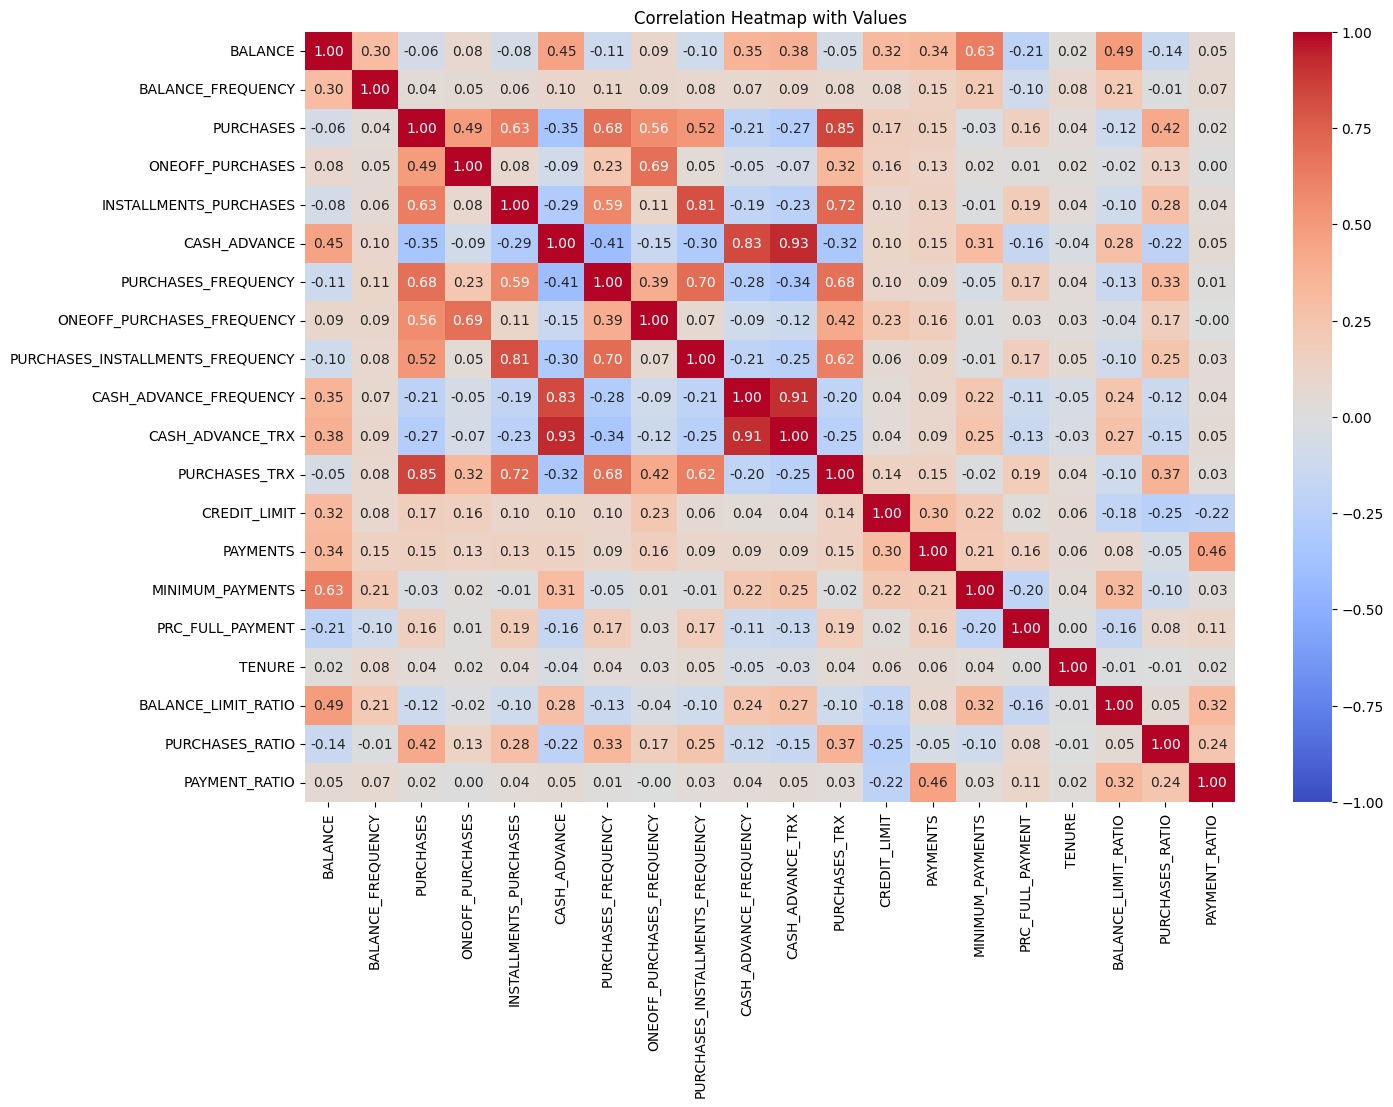

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap with Values")
plt.show()
df_model = df.copy()

# 7: Data Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)

# 8: Elbow Method for Optimal k

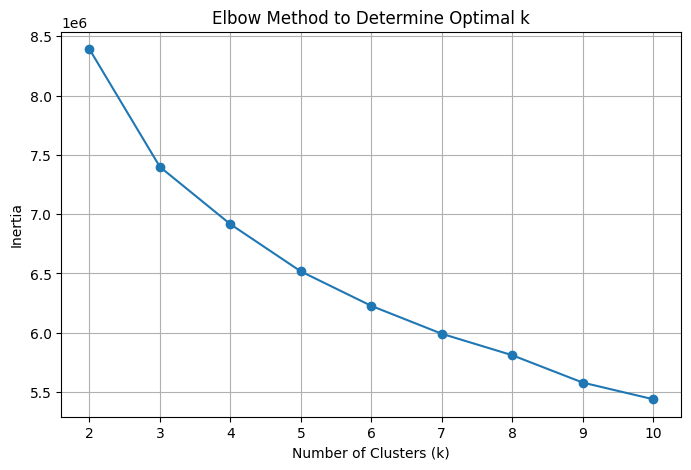

In [ ]:
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


# 9: Silhouette Scores for Different k

In [ ]:
sample_size = 10000
indices = np.random.choice(len(X_scaled), size=sample_size, replace=False)
X_sample = X_scaled[indices]

for k in [3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Silhouette on sampled data
    sampled_labels = labels[indices]
    score = silhouette_score(X_sample, sampled_labels)

    print(f"k={k}, Silhouette Score (sampled): {score:.3f}")
    kmeans = KMeans(n_clusters=3, random_state=42)


k=3, Silhouette Score (sampled): 0.202
k=4, Silhouette Score (sampled): 0.162
k=5, Silhouette Score (sampled): 0.158
k=6, Silhouette Score (sampled): 0.136


# 11: PCA Visualization

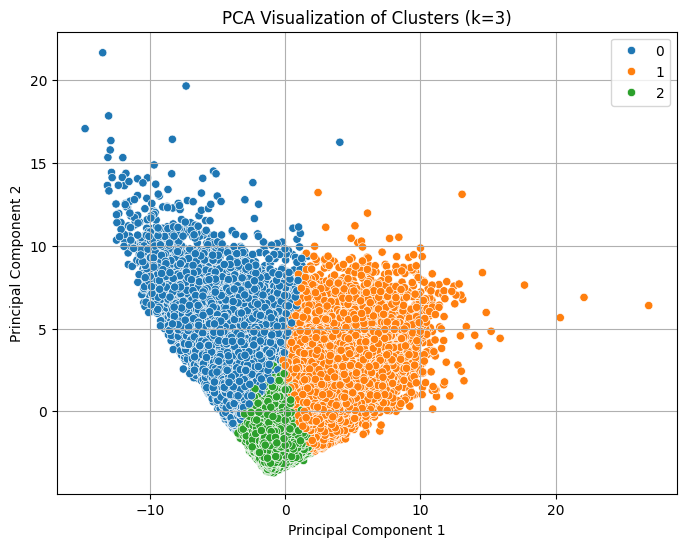

In [ ]:
cluster_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = cluster_labels

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_labels, palette='tab10')
plt.title("PCA Visualization of Clusters (k=3)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [ ]:
cluster_summary = df.groupby('KMeans_Cluster').mean(numeric_only=True).T
display(cluster_summary)


KMeans_Cluster,0,1,2
BALANCE,4815.111235,1378.342081,1152.760551
BALANCE_FREQUENCY,0.946193,0.898645,0.831710
PURCHASES,435.325739,3090.405819,646.155968
ONEOFF_PURCHASES,235.708448,1046.612374,141.658627
INSTALLMENTS_PURCHASES,344.253979,1556.077900,426.732389
CASH_ADVANCE,6661.044675,928.598665,1764.650216
PURCHASES_FREQUENCY,0.190547,0.912055,0.317153
ONEOFF_PURCHASES_FREQUENCY,0.133045,0.363463,0.117508
PURCHASES_INSTALLMENTS_FREQUENCY,0.156312,0.767885,0.214842
CASH_ADVANCE_FREQUENCY,0.331033,0.088396,0.098298


In [ ]:
cluster_recommendations = {
    0: {
        "Title": "Cash-Oriented High Balancers",
        "Products": [
            "Personal loans or overdraft facilities",
            "Installment EMI plans",
            "Credit counseling",
            "Low-fee cash-centric credit cards"
        ]
    },
    1: {
        "Title": "High Spenders & Payers",
        "Products": [
            "Premium credit cards (travel, cashback, etc.)",
            "Loyalty and rewards programs",
            "Travel perks: lounge access, insurance",
            "Offers to increase credit limits"
        ]
    },
    2: {
        "Title": "Conservative Users",
        "Products": [
            "Entry-level or no-annual-fee cards",
            "Spending-based offers to boost usage",
            "Payment reminders and auto-pay options",
            "Financial literacy campaigns"
        ]
    }
}

for cluster_id, info in cluster_recommendations.items():
    print(f"\nCluster {cluster_id} — {info['Title']}")
    for product in info['Products']:
        print(f"  ✔️ {product}")


Cluster 0 — Cash-Oriented High Balancers
  ✔️ Personal loans or overdraft facilities
  ✔️ Installment EMI plans
  ✔️ Credit counseling
  ✔️ Low-fee cash-centric credit cards

Cluster 1 — High Spenders & Payers
  ✔️ Premium credit cards (travel, cashback, etc.)
  ✔️ Loyalty and rewards programs
  ✔️ Travel perks: lounge access, insurance
  ✔️ Offers to increase credit limits

Cluster 2 — Conservative Users
  ✔️ Entry-level or no-annual-fee cards
  ✔️ Spending-based offers to boost usage
  ✔️ Payment reminders and auto-pay options
  ✔️ Financial literacy campaigns


## 🔍 Cluster Analysis & Bank Product Mapping

Based on KMeans clustering (k=3), we've analyzed the behavioral traits of each customer segment and mapped them to suitable banking products.

---

### 🟦 **Cluster 0 — “Cash-Oriented High Balancers”**

**🧠 Behavior Summary:**
- High **BALANCE**: ₹4815
- Very high **CASH_ADVANCE**: ₹6661
- Low **PURCHASES**: ₹435
- Low **Purchase Frequency**: 0.19
- Low **Full Payments**: 5%
- High **CREDIT_LIMIT**: ₹5242

**📌 Interpretation:**
These customers use credit cards more like short-term loans (via cash advances), and rarely repay in full.

**🎯 Recommended Banking Products:**
- 🏦 Personal loans or overdraft alternatives
- 💳 Installment EMI conversion offers
- 🧠 Credit counseling or financial wellness programs
- 🔸 Low-fee, cash-optimized card variants

---

### 🟩 **Cluster 1 — “High Spenders & Payers”**

**🧠 Behavior Summary:**
- High **PURCHASES**: ₹3090
- Very frequent transactions: **PURCHASES_TRX = 51.7**
- High **Installment** and **One-off Purchases**
- Best **PRC_FULL_PAYMENT**: 24%
- Strong **CREDIT_LIMIT**: ₹5162

**📌 Interpretation:**
This group uses cards for daily needs and repays responsibly. Ideal premium segment.

**🎯 Recommended Banking Products:**
- 🏆 Premium credit cards (travel, cashback, rewards)
- ✈️ Lounge access, concierge, travel insurance
- 🎁 Loyalty/reward programs
- 📈 Offers to increase credit limits or cross-sell investments

---

### 🟨 **Cluster 2 — “Conservative or Low-Usage Users”**

**🧠 Behavior Summary:**
- Low **BALANCE**, **PURCHASES**, and **CASH_ADVANCE**
- Low transaction counts
- Mid-level **CREDIT_LIMIT**: ₹3982
- Medium **Full Payment %** and **Payment Ratio**

**📌 Interpretation:**
These users are either new to credit, cautious spenders, or underutilizing their credit products.

**🎯 Recommended Banking Products:**
- 💳 Entry-level or zero annual fee cards
- 💡 Educational nudges (e.g., spending benefits)
- ⏰ Payment reminders and auto-debit enrollment
- 📣 Spend-based cashback campaigns

---

### 📊 Summary Table

| Cluster | Segment Title                | Key Traits                              | Suggested Products                                                                 |
|---------|------------------------------|------------------------------------------|------------------------------------------------------------------------------------|
| 0       | Cash-Oriented High Balancers | High balance, cash advances              | Loans, EMI, counseling, low-fee cards                                             |
| 1       | High Spenders & Payers       | High purchases, frequent use, good repay | Premium cards, rewards, travel perks, credit limit upgrades                       |
| 2       | Conservative Users           | Low usage, cautious spending             | Entry-level cards, auto-pay, usage nudges, education offers                       |

---
